# Bank Marketing Prediction

## Table of Contents
1 [Project Summary](#summary)  
2 [Loading](#loading)  
2.1 [Import Libraries](#libraries)  
2.2 [Import Data](#data)  
2.3 [Functions](#function)  
3 [Exploring the data](#eda)  
3.1 [Data Overview](#overview)  
3.1.1 [Input Variables](#input)  
3.2 [Data Cleaning](#cleaning)  
3.3 [Visualisation](#visualisations)  
3.4 [Feature Engineering](#feature)  
3.5 [Preprocessing](#preprocess)  
4 [Model Deployment](#modeldep)  
4.1 [Model Development](#developmodel)  
4.2 [Model Tuning](#modeltune)  
4.3 [Model Validation](#validate)  
5 [Deploy](#deploy)  

# Project Summary 
<a id="summary"></a>
***
**Situation**  
Direct marketing campaign is one of the main strategies to enhance the business in banking industry and identifying target clients is a critical problem to make a campaign success. This project aims to predict  whether a client will subscribe bank term deposit or not as a result of marketing efforts.
  
**Action and Goal**  
Using the data related to direct marketing campaign of a Portuguese banking institution, exploratory data analysis (EDA) and model deployment are implemented by using Python and jupyter notebook. The goal is to build a model that predicts the client's decision ('yes' or 'no'). Since the output from the model is expected to be binary, a binary model is needed to be built by exploring classification algorithms such as decision tree, random forest, support vector machine (SVM) and neural networks. The deployed model is evaluated by the accuracy of the prediction and the ROC curve.  
  
**Output**  
(later... ex. The model built by XXXX predicts the client's decision with the accuracy of XX% and ROC curve shows XXXXX)

# Loading
<a id="loading"></a>

## Import Libraries
<a id="libraries"></a>
***
These libraries can be installed from **Pipfile** and **Pipfile.lock** using pipenv (**Python version: 3.7.5**)

In [2]:
# Import libraries
import os, sys
sys.path.append(os.pardir) # to import files in the parent directory

import numpy as np
import pandas as pd
import pandas_profiling as pdp

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly

import sklearn as sk


## Import data
<a id="data"></a>
***
  
**Files in "data" directory:**  
  
- bank.csv: 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).  

- bank-full.csv: all examples and 17 inputs, ordered by date (older version of this dataset with less inputs)   

- bank-names.txt: Attributes for bank-full.csv and bank.csv

- bank-additional.csv: 10% of the examples (4119), randomly selected from 1), and 20 inputs.  

- bank-additional-full.csv: all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in (Moro et al., 2014)  

- bank-additional-names.txt: Attributes for bank-additional-full.csv and bnak-additional.csv  

(Moro et al., 2014) S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [4]:
# import data
# data_full = pd.read_csv("data/bank-full.csv", sep=";")
data_add_full = pd.read_csv("data/bank-additional-full.csv", sep=";")

## Functions
<a id="function"></a>
***
Defined custom functions are shown in this section.

# Exploring the data
<a id="eda"></a>

## Data Overview
<a id="overview"></a>
***
Quick overview of the data is generated as ProfileReport of ***pandas_profile*** library.  

### Input variables
<a id="input"></a>
bank client data:  
      
- age (numeric) 

- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  

- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  

- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  

- default: has credit in default? (categorical: 'no','yes','unknown')  

- housing: has housing loan? (categorical: 'no','yes','unknown')  

- loan: has personal loan? (categorical: 'no','yes','unknown')  


related with the last contact of the current campaign:  

- contact: contact communication type (categorical: 'cellular','telephone')  

- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  

- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  

- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

other attributes:  
      
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  

- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  

- previous: number of contacts performed before this campaign and for this client (numeric)  

- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

social and economic context attributes  

- emp.var.rate: employment variation rate - quarterly indicator (numeric)  
      
- cons.price.idx: consumer price index - monthly indicator (numeric)  
      
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)  

- euribor3m: euribor 3 month rate - daily indicator (numeric)  

- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):  

- y - has the client subscribed a term deposit? (binary: 'yes','no')

In [9]:
data_add_full.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [17]:
data_add_full.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [18]:
data_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

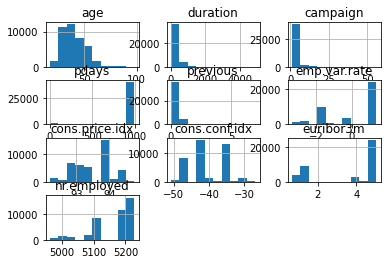

In [19]:
data_add_full.hist()

In [20]:
data_add_full.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

<AxesSubplot:>

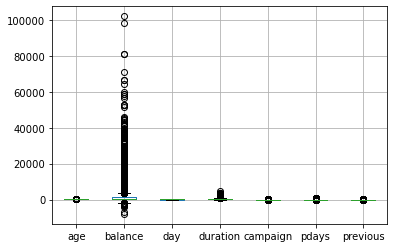

In [11]:
data_add_full.boxplot()

In [5]:
# Overview of data (bank-additional-full.csv)
pdp.ProfileReport(data_add_full)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
data_add_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

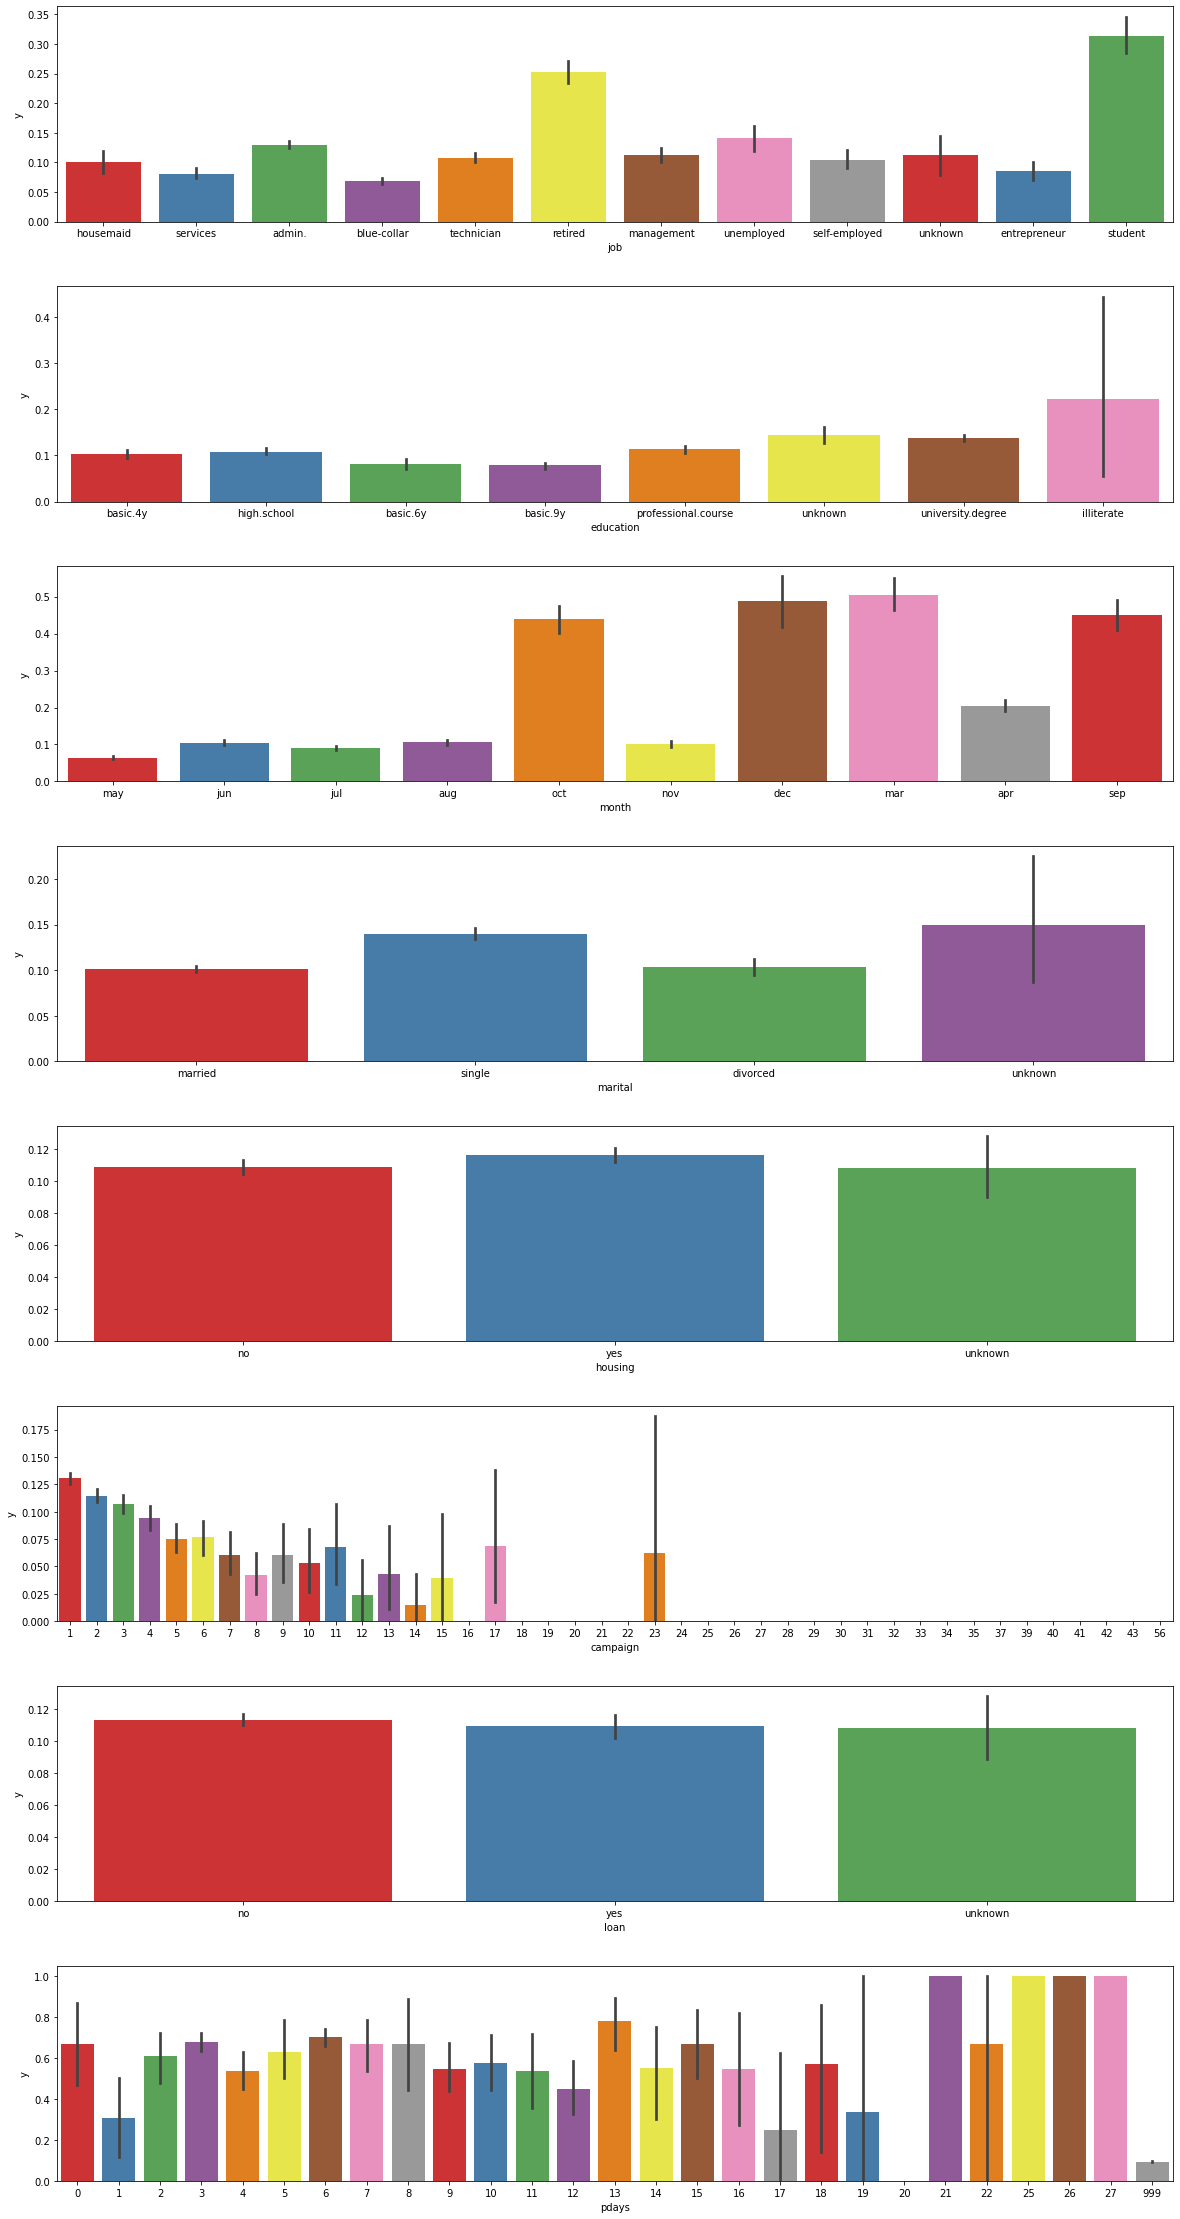

In [26]:
# Subscribe rate for each attribute
df_copy = data_add_full.copy()

df_copy['y'] = df_copy['y'].map({'yes': 1, 'no': 0})

columns = ['job', 'education', 'month', 'marital', 'housing', 'campaign', 'loan', 'pdays']

fig, axes = plt.subplots(len(columns), 1, figsize=(20,40))
plt.subplots_adjust(hspace=0.3)

for column, ax in zip(columns, axes):
    sns.barplot(x=column, y='y', data=df_copy,ax=ax, palette='Set1')
plt.show()

## Data Cleaning 
<a id="cleaning"></a>
Data imputation is implemented for futhrer analyses in following sections.

## Visualisation
<a id="visualisations"></a>
*** 
Using visualisation tools such as Seaborn and Plotly, key features of the data are visulaised.

## Fearture Engineering
<a id="feature"></a>
***
Based on the discovery above, raw data is processed to modify exisiting features or extract/create new features.  

## Preprocessing
<a id="preprocess"></a>
*** 
Datasets are preprocessed for model development.

# Model Deployment
<a id="modeldep"></a>
Binary classification models are used for model development to predict the client's decision.

## Model Development
<a id="developmodel"></a>

## Model Tuning
<a id="modeltune"></a>

## Model Validation
<a id="validate"></a>

# Deploy
<a id="deploy"></a>